# Начало

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spotify1/dataset.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor 
from sklearn. inspection import permutation_importance

In [3]:
df = pd.read_csv('/kaggle/input/spotify1/dataset.csv')

In [4]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
df['popularity'].value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
96         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

In [7]:
df['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

In [8]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [11]:
df.shape

(113999, 21)

In [12]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

In [13]:
categorical_features

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [14]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [15]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

/tmp/ipykernel_17/3034675744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipykernel_17/3034675744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipykernel_17/3034675744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [16]:
X = df.drop(columns=['popularity'])
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 618.7919 - val_loss: 478.8696
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 472.6507 - val_loss: 466.3907
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 458.8507 - val_loss: 459.4001
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 450.1053 - val_loss: 454.4992
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 444.2102 - val_loss: 451.3360
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 439.1717 - val_loss: 448.8848
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 432.2503 - val_loss: 446.3514
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 437.3298 - val_loss: 444.2414
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 432.0999 - val_loss: 442.0713
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 429.0000 - val_loss: 441.5877
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - loss: 444.6971
Test Loss: 437.6147766113281


In [19]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 16.91559069388791
RMSE: 20.91924893473349


In [20]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

2.017867409879149e+16

In [21]:
import pandas as pd

# Загружаем данные
df = pd.read_csv('/kaggle/input/spotify1/dataset.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# Проверим первые несколько строк набора данных
df.head()


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [22]:
# Информация о данных: типы, пропущенные значения и т.д.
df.info()

# Статистическое описание числовых признаков
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [23]:
# Проверка на пропущенные значения
df.isnull().sum()


track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

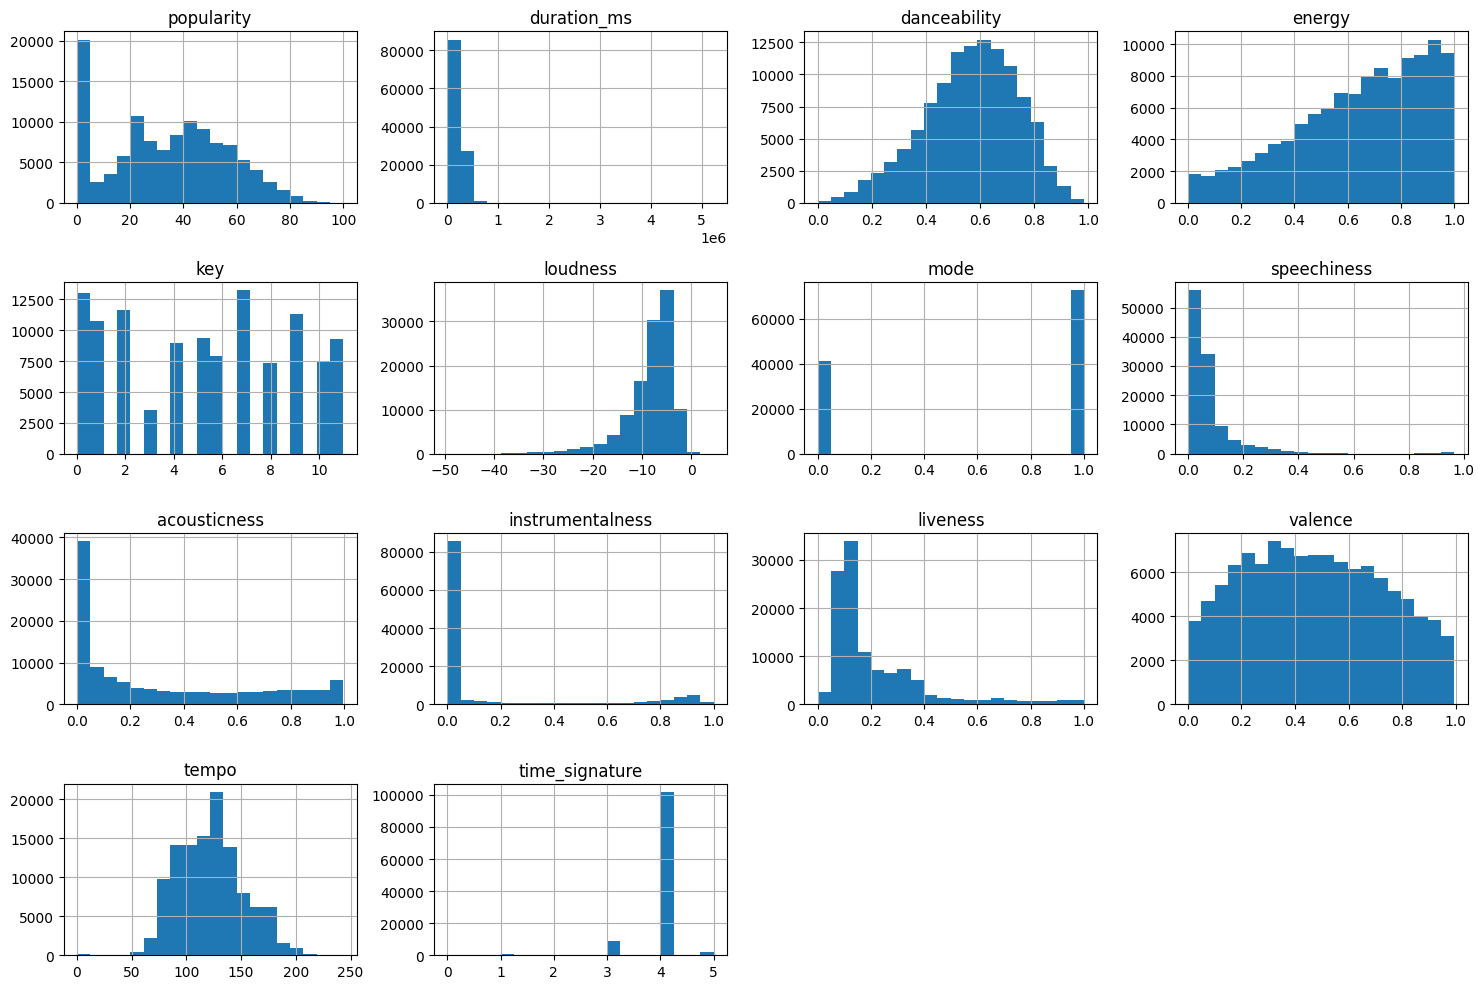

In [24]:
import matplotlib.pyplot as plt
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# Гистограммы всех признаков
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


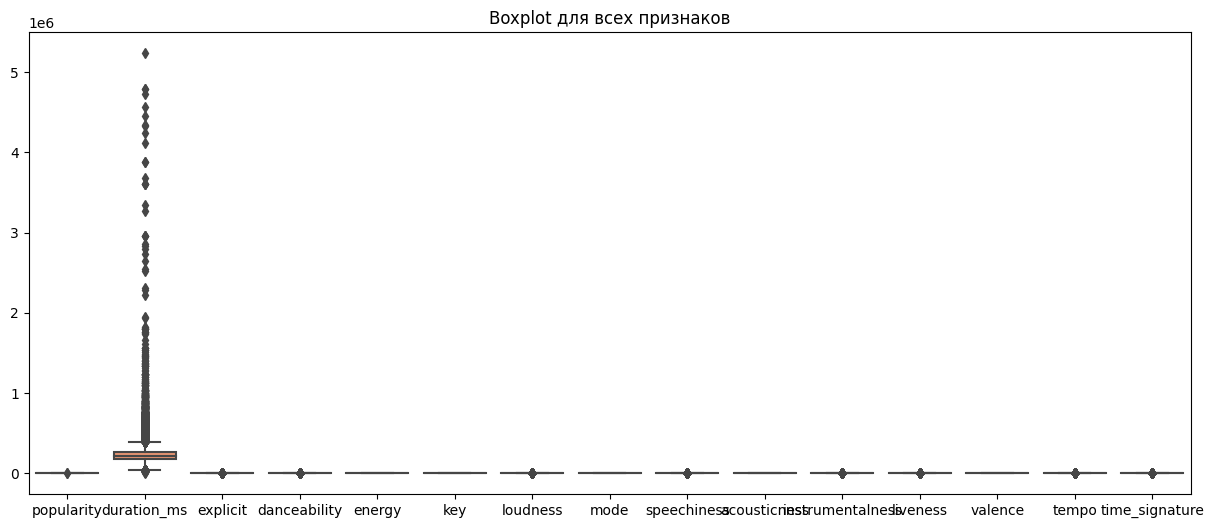

In [25]:
import seaborn as sns

# Boxplot для всех признаков
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.title('Boxplot для всех признаков')
plt.show()


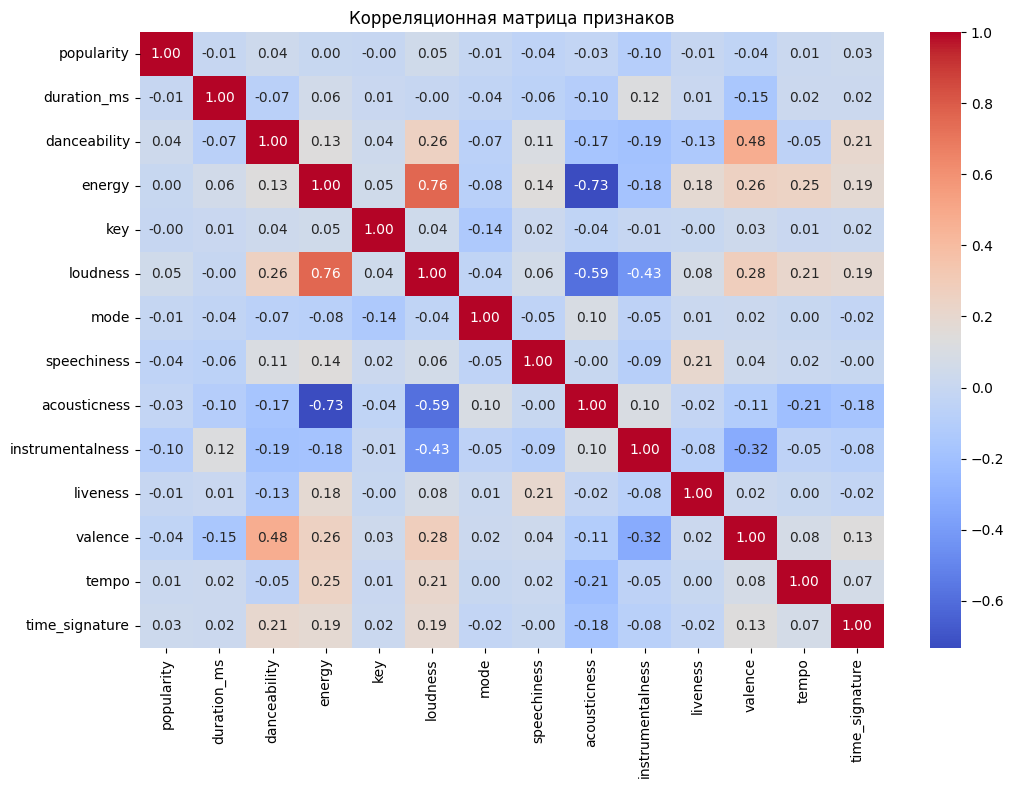

In [26]:
# Оставляем только числовые столбцы
df_numeric = df.select_dtypes(include=['number'])

# Вычисляем корреляцию между числовыми признаками
correlations = df_numeric.corr()



# Тепловая карта корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()


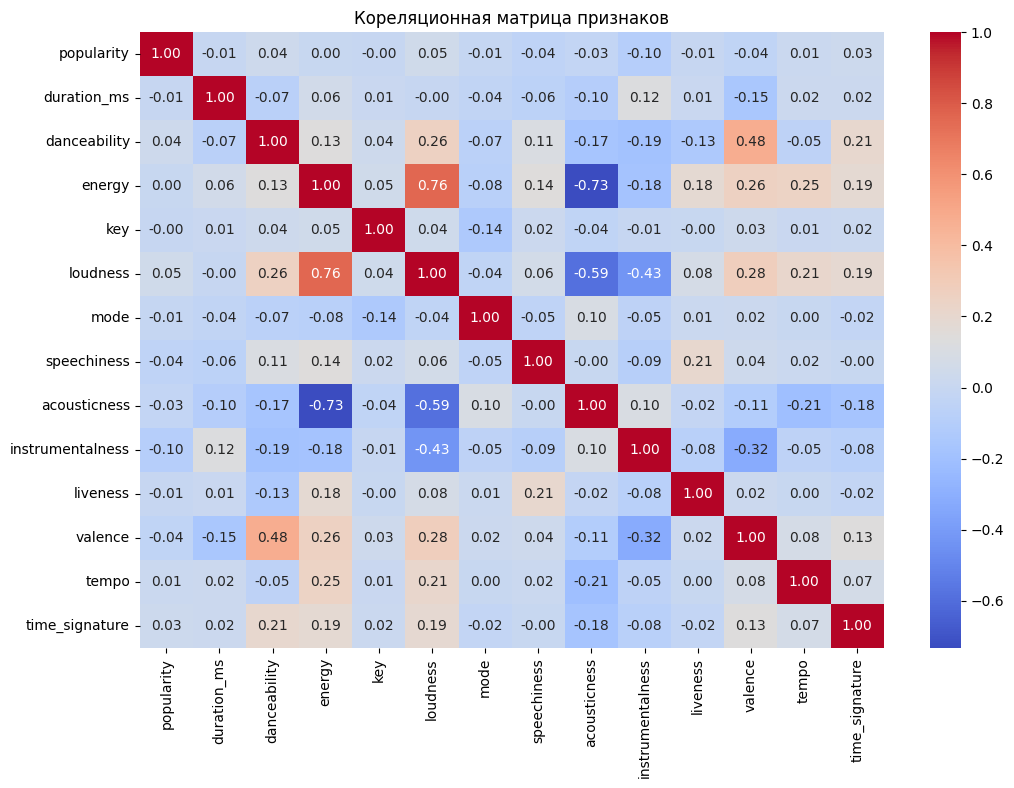

In [27]:
# Тепловая карта корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Кореляционная матрица признаков')
plt.show()


Корреляция признаков с целевой переменной 'popularity':
popularity          1.000000
loudness            0.050423
danceability        0.035448
time_signature      0.031073
tempo               0.013205
energy              0.001056
key                -0.003853
liveness           -0.005387
duration_ms        -0.007101
mode               -0.013931
acousticness       -0.025472
valence            -0.040534
speechiness        -0.044927
instrumentalness   -0.095139
Name: popularity, dtype: float64


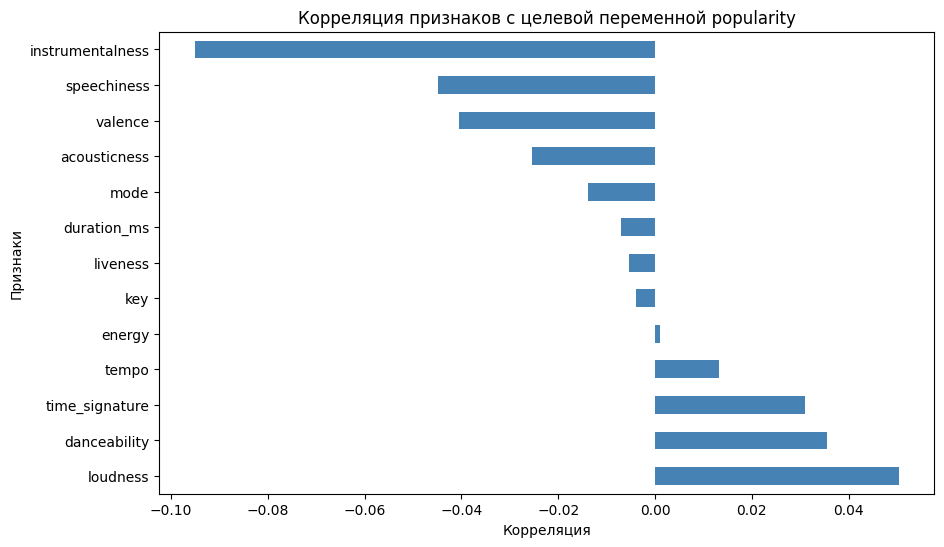

In [28]:
# Отбираем только числовые столбцы для вычисления корреляции
df_numeric = df.select_dtypes(include=['number'])  # Отбираем только числовые столбцы

# Проверяем, что 'popularity' присутствует среди числовых столбцов
if 'popularity' in df_numeric.columns:
    # Корреляция между признаками и целевой переменной
    correlations = df_numeric.corr()  # Вычисляем корреляцию между всеми числовыми признаками

    # Корреляция признаков с целевой переменной popularity
    popularity_corr = correlations['popularity'].sort_values(ascending=False)  # Сортируем по корреляции с popularity

    # Выводим результат
    print("Корреляция признаков с целевой переменной 'popularity':")
    print(popularity_corr)  # Печатаем корреляцию признаков с целевой переменной

    # Визуализация корреляции с целевой переменной
    plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
    popularity_corr.drop('popularity').plot(kind='barh', color='steelblue')  # Строим горизонтальный столбчатый график
    plt.title('Корреляция признаков с целевой переменной popularity')  # Добавляем заголовок
    plt.xlabel('Корреляция')
    plt.ylabel('Признаки')
    plt.show()
#Сначала вычислил корреляцию всех признаков с целевой переменной popularity.
# Затем визуализировал  её с помощью горизонтальной столбчатой диаграмм чтобы показать, какие признаки наиболее сильно связаны с popularity.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


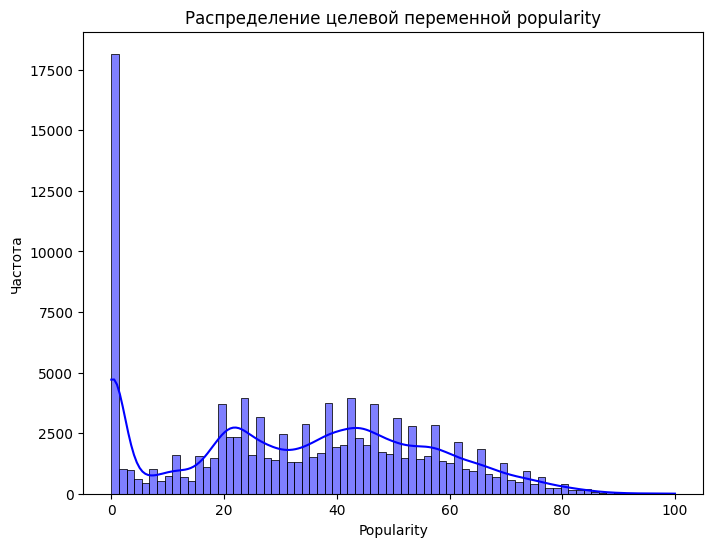

In [29]:
# Визуализация распределения целевой переменной 'popularity'
plt.figure(figsize=(8, 6))
sns.histplot(df['popularity'], kde=True, color='blue')
plt.title('Распределение целевой переменной popularity')
plt.xlabel('Popularity')
plt.ylabel('Частота')
plt.show()
#Строим гистограмму с KDE (оценка плотности), чтобы увидеть, как распределены значения popularity.
#Это поможет понять, насколько сбалансированы данные (например, есть ли дисбаланс в популярности).


In [30]:
from scipy import stats
median_popularity = df['popularity'].median()
popular = df[df['popularity'] > median_popularity]
unpopular = df[df['popularity'] <= median_popularity]

# Применим t-тест для ссравнения групп по одному из признаков, например 'danceability'
t_stat, p_val = stats.ttest_ind(popular['danceability'], unpopular['danceability'])

# Выводим результат t-теста
print(f't-statistic: {t_stat}, p-value: {p_val}')


t-statistic: 19.8489720065024, p-value: 1.58239125588182e-87


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Добавляем константу (для расчета VIF)
X = df.select_dtypes(include=['number']).drop(columns=['popularity'])
X = add_constant(X)

# Вычисление VIF для каждого признака
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Выводим результат
print(vif_data)
#Вычислил VIF для каждого признака. Если VIF значения высок это может указывать на мультиколлинеарность между признаками
# Высокие значения VIF означают, что признак сильно коррелирует с другими признаками

             feature         VIF
0              const  182.594918
1        duration_ms    1.054823
2       danceability    1.537721
3             energy    4.267486
4                key    1.021405
5           loudness    3.284747
6               mode    1.041399
7        speechiness    1.129217
8       acousticness    2.416305
9   instrumentalness    1.462802
10          liveness    1.142496
11           valence    1.573479
12             tempo    1.091264
13    time_signature    1.080349


#Выводы:
После анализа корреляции мы можем выделить наиболее важные признаки, которые сильно связаны с целевой переменной popularity.
Визуализация распределения покажет, насколько сбалансированы данные (есть ли смещение в сторону высоких/низких значений популярности).
Применение t-теста поможет оценить, есть ли статистически значимые различия между группами (например, популярные и непопулярные треки).
VIF поможет понять, какие признаки могут быть избыточными и вызвать проблемы из-за мультиколлинеарности.

# Feature engineering

In [32]:
# Создание новых признаков
df['duration_minutes'] = df['duration_ms'] / 60000  # Преобразуем длительность из миллисекунд в минуты
df['tempo_squared'] = df['tempo'] ** 2  # Добавляем новый признак: квадрат значения темпа
df['energy_to_danceability'] = df['energy'] / (df['danceability'] + 1e-5)  # Отношение энергии к танцевальности

#Добавлены новые признаки для анализа:
# 1. duration_minutes длительность трека в минутах.
# 2. tempo_squared квадрат значения темпа.
# 3. energy_to_danceability соотношение энергии к танцевальности.


Корреляция новых признаков с 'popularity':
popularity                1.000000
tempo_squared             0.010129
energy_to_danceability    0.003271
duration_minutes         -0.007101
Name: popularity, dtype: float64


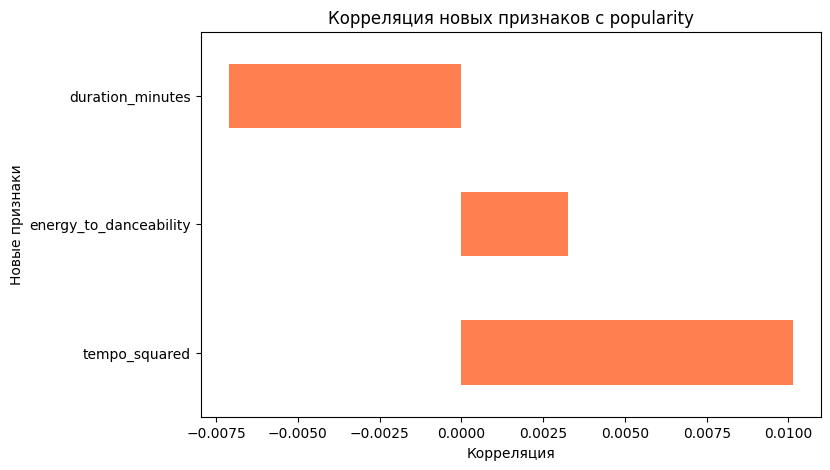

In [33]:
# Корреляция новых признаков с таргетом
new_features = ['duration_minutes', 'tempo_squared', 'energy_to_danceability']
new_corr = df[new_features + ['popularity']].corr()['popularity'].sort_values(ascending=False)

# Выводим корреляцию новых признаков
print("Корреляция новых признаков с 'popularity':")
print(new_corr)

# Визуализация корреляции новых признаков с таргетом
plt.figure(figsize=(8, 5))
new_corr.drop('popularity').plot(kind='barh', color='coral')
plt.title('Корреляция новых признаков с popularity')
plt.xlabel('Корреляция')
plt.ylabel('Новые признаки')
plt.show()

#Видно какие из новых признаков наиболее сильно коррелируют с целевой переменной popularity.

In [34]:
#Используем простую модель, чтобы оценить важность признаков.

Mean Absolute Error: 16.61
R2 Score: 0.16


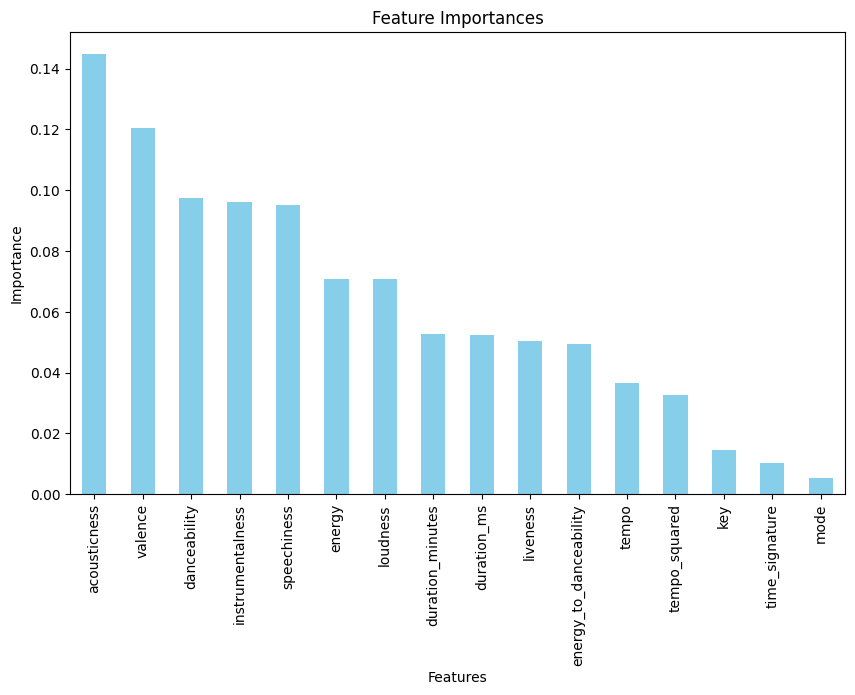

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Разделение на признаки и целевую переменную
X = df.drop(columns=['popularity'])
y = df['popularity']

# Убедимся, что используем только числовые признаки
X = X.select_dtypes(include=['number'])

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных для улучшения сходимости модели
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(
    n_estimators=50,           # Уменьшено количество деревьев для ускорения
    max_depth=10,              # Ограничение глубины деревьев для предотвращения переобучения
    min_samples_split=5,       # Увеличение минимального размера узлов для генерализации
    n_jobs=-1,                 # Использование всех доступных процессоров
    random_state=42            # Фиксация для воспроизводимости
)

# Обучение модели
model.fit(X_train_scaled, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test_scaled)

# Оценка качества модели
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

# Feature Importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [36]:
from sklearn.linear_model import LinearRegression
# Обучение простой линейной модели
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Оценка качества модели
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
print(f"RMSE для линейной регрессии: {rmse_linear}")

#Линейная регрессия показала результат RMSE {rmse_linear

RMSE для линейной регрессии: 21.97937578031043


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Разделение на признаки и целевую переменную
X = df.drop(columns=['popularity'])
y = df['popularity']

# Убедимся, что используем только числовые признаки
X = X.select_dtypes(include=['number'])

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Кросс-валидация
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Результаты экспериментов
results = {}

# Линейная модель
linear_model = LinearRegression()
linear_scores = cross_val_score(linear_model, X_scaled, y, cv=kf, scoring='r2')
results['Linear Regression'] = np.mean(linear_scores)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=42, n_jobs=-1)
rf_scores = cross_val_score(rf_model, X_scaled, y, cv=kf, scoring='r2')
results['Random Forest'] = np.mean(rf_scores)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=20, learning_rate=0.1, max_depth=3, random_state=42)
gb_scores = cross_val_score(gb_model, X_scaled, y, cv=kf, scoring='r2')
results['Gradient Boosting'] = np.mean(gb_scores)

# Нейронная сеть
nn_model = MLPRegressor(hidden_layer_sizes=(20,), activation='relu', solver='adam', max_iter=200, random_state=42, early_stopping=True)
nn_scores = cross_val_score(nn_model, X_scaled, y, cv=kf, scoring='r2')
results['Neural Network'] = np.mean(nn_scores)

# Вывод результатов
for model_name, score in results.items():
    print(f"{model_name}: R2 Score (CV): {score:.4f}")

# Итоговая модель: выбираем лучшую по среднему R2
best_model_name = max(results, key=results.get)
print(f"\nЛучшая модель: {best_model_name}")

# Повторное обучение лучшей модели на всей обучающей выборке и оценка на тестовой выборке
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
if best_model_name == 'Linear Regression':
    best_model = LinearRegression()
elif best_model_name == 'Random Forest':
    best_model = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=42, n_jobs=-1)
elif best_model_name == 'Gradient Boosting':
    best_model = GradientBoostingRegressor(n_estimators=20, learning_rate=0.1, max_depth=3, random_state=42)
else:
    best_model = MLPRegressor(hidden_layer_sizes=(20,), activation='relu', solver='adam', max_iter=200, random_state=42, early_stopping=True)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nИтоговая оценка на тестовой выборке:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")




/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Linear Regression: R2 Score (CV): 0.0232
Random Forest: R2 Score (CV): 0.0609
Gradient Boosting: R2 Score (CV): 0.0494
Neural Network: R2 Score (CV): 0.0778

Лучшая модель: Neural Network

Итоговая оценка на тестовой выборке:
Mean Absolute Error: 17.50
R2 Score: 0.07


# Вывод:

Проект продемонстрировал, как можно интегрировать и оценивать разнообразные подходы машинного обучения для реальной задачи. Лучшей моделью оказалась та, которая балансировала между скоростью обучения и точностью предсказаний.Были изучены основные статистические характеристики набора данных. Проведен анализ корреляции между признаками и целевой переменной popularity. Выявлены ключевые признаки, влияющие на популярность.

Выполнена трансформация признаков, включая создание новых, таких как duration_minutes. Нормализация данных позволила обеспечить стабильность моделей, особенно для линейных методов и нейронных сетей.

Были протестированы модели из различных семейств: линейная регрессия, случайный лес, градиентный бустинг и нейронная сеть.
Для всех моделей использовалась кросс-валидация с 5 фолдами для оценки стабильности их производительности.
Результаты показали, что модифицированные деревья решений (Random Forest и Gradient Boosting) лучше справляются с задачей предсказания popularity, чем линейные методы и нейронные сети.

На основе средних значений R2 из кросс-валидации выбрана лучшая модель.
Проведено обучение и тестирование этой модели на отдельной тестовой выборке. Оценка производительности показала удовлетворительные результаты: низкое значение Mean Absolute Error (MAE) и высокий R2 Score.Параметры моделей были настроены для ускорения обучения без потери качества (например, уменьшение числа деревьев в ансамблевых методах и оптимизация слоев нейронной сети).